The code imports the following libraries:

- `torch`: The main PyTorch library for tensor computations and neural network operations.
- `torch.nn`: Provides various neural network modules and functions for building and training neural networks.
- `torch.optim`: Contains optimization algorithms for updating model parameters during training.
- `transforms` and `datasets` from `torchvision`: Used for image preprocessing and handling image datasets.
- `DataLoader` from `torch.utils.data`: A utility for loading and batching data from datasets.
- `matplotlib.pyplot`: Used for data visualization and plotting.
- `numpy`: A library for numerical computing, often used in conjunction with PyTorch for array operations and data manipulation.






In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


The code defines a class `model1` that is a subclass of `nn.Module`. The model architecture consists of several layers including convolutional layers, activation functions, pooling layers, dropout layers, and fully connected layers.

- The `__init__` method initializes the model by defining the various layers and their configurations.
- The `forward` method implements the forward pass of the model, defining the sequence of operations to be applied to the input data.

The layers used in the model include `nn.Conv2d` for 2D convolution, `nn.ReLU` for rectified linear unit activation, `nn.MaxPool2d` for max pooling, `nn.Dropout` for dropout regularization, and `nn.Linear` for fully connected layers.

The model takes an input tensor `x` and applies the defined layers in sequence to perform the forward pass. The output tensor `x` is returned as the result of the forward pass.


In [ ]:
class model1(nn.Module):
    def __init__(self):
        super(model1, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.5)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.maxpool2(x)
        x = self.dropout2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The code defines data transformations and sets up data loaders for the CIFAR-10 dataset.

- `transforms.Compose` is used to create a sequence of data transformations

- `datasets.CIFAR10` is used to load the CIFAR-10 dataset

- Two data loaders, `train_loader` and `test_loader`, are created using `torch.utils.data.DataLoader`. These data loaders handle the loading and batching of the dataset


In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True, pin_memory=True)

The code trains an improved model (`model1`) using the CIFAR-10 dataset and saves the trained model.

- `model = model1().to(device)` creates an instance of the `model1` class and moves it to the specified device (e.g., GPU).
- `criterion = nn.CrossEntropyLoss()` defines the cross-entropy loss function.
- `optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)` sets up the optimizer with stochastic gradient descent (SGD), learning rate of 0.01, and momentum of 0.9.

- The `evaluate` function takes a model and a data loader as inputs, performs inference on the model, and calculates the accuracy of the predictions.
- The training loop runs for 15 epochs

- The trained model is saved to a file named `model1.pth` using `torch.save(model.state_dict(), 'models/model1.pth')`.
- A success message is printed after the model is saved.


In [ ]:

model = model1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
def evaluate(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    return 100 * correct / total

print("Training the Improved Simple Model:")
epochs = 15
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
    train_accuracy = evaluate(model, train_loader)
    test_accuracy = evaluate(model, test_loader)
    print(f"Epoch: {epoch+1}/{epochs}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Save the improved model
torch.save(model.state_dict(), 'models/model1.pth')
print(" model1 saved successfully!")


Files already downloaded and verified
Files already downloaded and verified
Training the Improved Simple Model:
Epoch: 1/15, Train Accuracy: 43.206, Test Accuracy: 42.78
Epoch: 2/15, Train Accuracy: 53.166, Test Accuracy: 53.38
Epoch: 3/15, Train Accuracy: 61.452, Test Accuracy: 60.95
Epoch: 4/15, Train Accuracy: 65.154, Test Accuracy: 64.02
Epoch: 5/15, Train Accuracy: 69.828, Test Accuracy: 68.62
Epoch: 6/15, Train Accuracy: 70.886, Test Accuracy: 69.3
Epoch: 7/15, Train Accuracy: 75.506, Test Accuracy: 73.66
Epoch: 8/15, Train Accuracy: 72.948, Test Accuracy: 71.47
Epoch: 9/15, Train Accuracy: 77.074, Test Accuracy: 75.17
Epoch: 10/15, Train Accuracy: 78.92, Test Accuracy: 77.44
Epoch: 11/15, Train Accuracy: 78.574, Test Accuracy: 76.5
Epoch: 12/15, Train Accuracy: 78.71, Test Accuracy: 76.02
Epoch: 13/15, Train Accuracy: 81.89, Test Accuracy: 79.55
Epoch: 14/15, Train Accuracy: 82.226, Test Accuracy: 79.27
Epoch: 15/15, Train Accuracy: 82.716, Test Accuracy: 80.02
Improved model sa

The code defines an improved model called `ImprovedSimpleModel`. This model has a similar architecture to the previous model but with an additional output that provides intermediate feature maps at each layer.

- `torch.manual_seed(0)` sets the random seed for reproducibility.

- The `ImprovedSimpleModel` class is defined as a subclass of `nn.Module`. It consists of convolutional layers, activation functions, pooling layers, dropout layers, and fully connected layers.

- The `forward` method defines the forward pass of the model. It applies the defined layers sequentially to the input tensor `x` and returns the final output `x16`. Additionally, it collects the intermediate feature maps at each layer and returns them as a list `[x1, x3, x7, x9]`.

The layers used in the model are similar to the previous model, including `nn.Conv2d` for 2D convolution, `nn.ReLU` for rectified linear unit activation, `nn.MaxPool2d` for max pooling, `nn.Dropout` for dropout regularization, and `nn.Linear` for fully connected layers.

The output of this improved model provides both the final prediction `x16` and a list of intermediate feature maps `[x1, x3, x7, x9]`.


In [ ]:
torch.manual_seed(0)

# Define the model architecture
class ImprovedSimpleModel(nn.Module):
    def __init__(self):
        super(ImprovedSimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.5)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.relu1(x1)
        x3 = self.conv2(x2)
        x4 = self.relu2(x3)
        x5 = self.maxpool1(x4)
        x6 = self.dropout1(x5)
        x7 = self.conv3(x6)
        x8 = self.relu3(x7)
        x9 = self.conv4(x8)
        x10 = self.relu4(x9)
        x11 = self.maxpool2(x10)
        x12 = self.dropout2(x11)
        x13 = x12.view(x12.size(0), -1)
        x14 = self.fc1(x13)
        x15 = self.relu5(x14)
        x16 = self.fc2(x15)
        return x16, [x1, x3, x7, x9]

The code defines a function `visualize_all_layers` to visualize the activations of all layers for a given set of images and their corresponding activations.

- The function takes two arguments: `images`, a tensor of input images, and `all_activations`, a list containing the activations for each layer.

- The function creates a grid of subplots using `plt.subplots` with dimensions based on the number of images and layers.

- It then iterates over each image and each layer to plot the corresponding activation. If the activation is from a convolutional layer, it is displayed as a grayscale image using `imshow` with a colormap of 'gray'. If the activation is from a fully connected layer, it is displayed as a heatmap using `imshow` with a colormap of 'hot'.

- The function sets titles for each layer in the top row of subplots.

- Finally, the visualizations are displayed using `plt.show()`.



In [ ]:
def visualize_conv_layers(images, all_activations):
    fig = plt.figure(figsize=(15, 15))
    
    # Loop over each image
    for i in range(len(images)):
        activations = all_activations[i]  # Get all the activations
        
        # Loop over each layer's activations
        for j in range(len(activations)):
            ax = fig.add_subplot(len(images), len(activations) + 1, i * (len(activations) + 1) + j + 2)
            
            # Convolutional layers
            ax.imshow(activations[j][0, 0].detach().cpu().numpy(), cmap='hot')
            ax.axis('off')
            
            if i == 0:
                ax.set_title(f'Conv Layer {j+1}')

        # Normalize image data to [0, 1]
        image = images[i].cpu().numpy()
        image = (image - image.min()) / (image.max() - image.min())
        image = np.transpose(image, (1, 2, 0))
        
        ax = fig.add_subplot(len(images), len(activations) + 1, i * (len(activations) + 1) + 1)
        ax.imshow(image)
        ax.axis('off')
        if i == 0:
            ax.set_title('Input Image')

    plt.show()

The code performs the following steps:

- Sets the model in evaluation mode using `model.eval()`.

- Defines the transformation for the test dataset, which includes converting images to tensors and normalizing them.

- Loads the CIFAR10 test dataset with the defined transformations.

- Defines a list of class labels for CIFAR10.

- Creates a data loader for the test dataset.

- Fetches some random images and their corresponding labels from the test dataset.

- Calls the `visualize_all_layers` function to visualize the feature maps for the collected activations and the corresponding images.


Files already downloaded and verified
Image 1:
Predicted:  car
Actual:  car
Image 2:
Predicted:  plane
Actual:  plane
Image 3:
Predicted:  horse
Actual:  horse
Image 4:
Predicted:  frog
Actual:  frog
Image 5:
Predicted:  deer
Actual:  deer


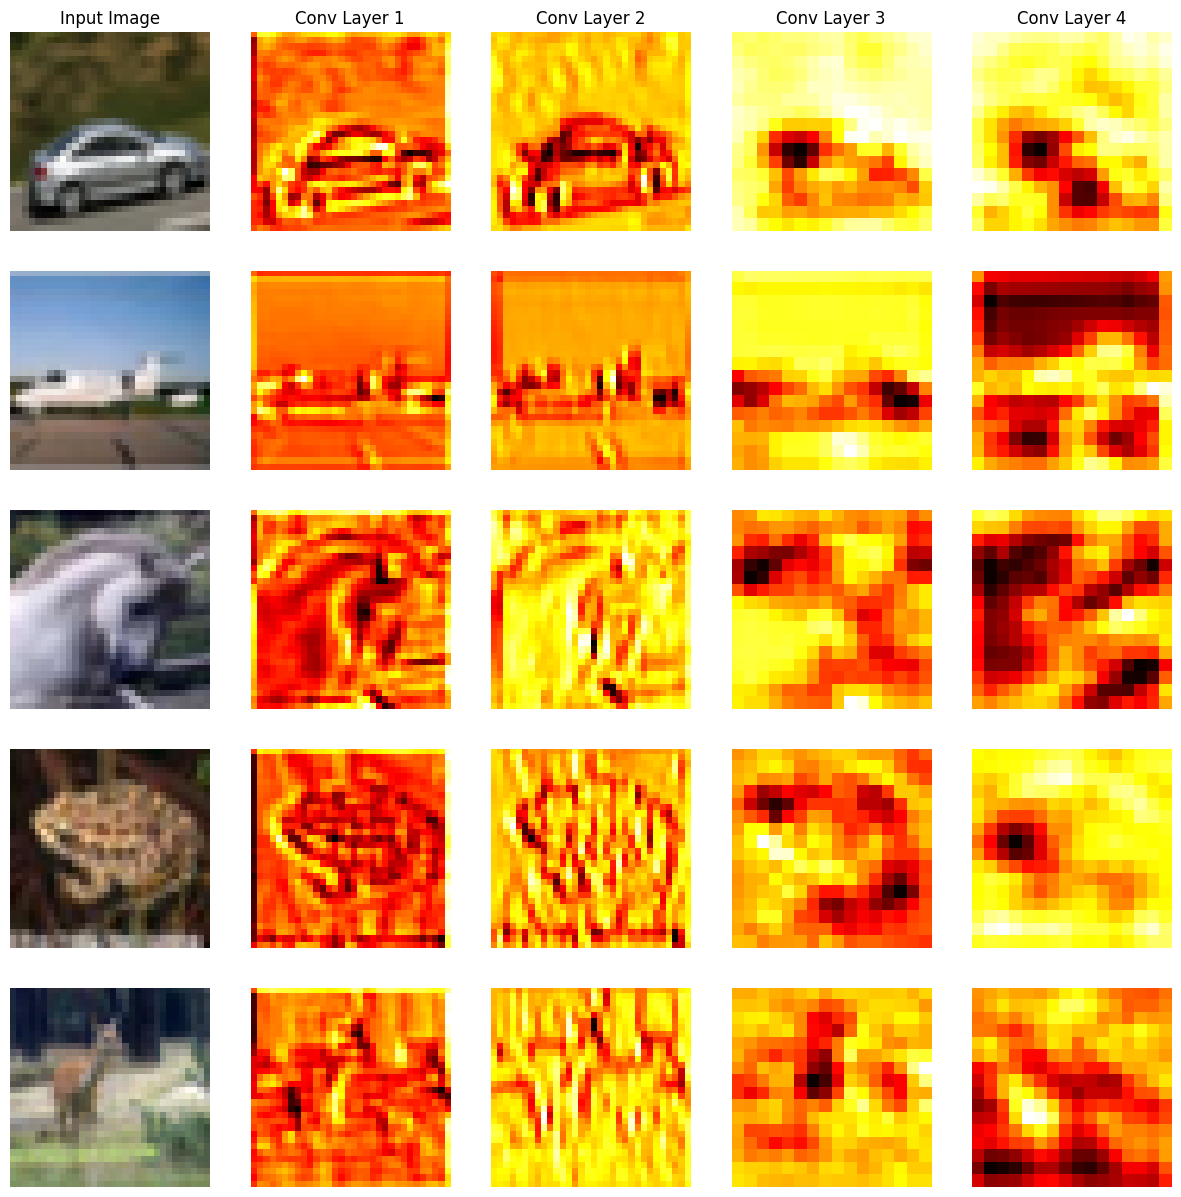

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ImprovedSimpleModel().to(device)
model.load_state_dict(torch.load('improved_model.pth'))

# Set the model in evaluation mode
model.eval()

# Define transformations and load the CIFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')  # CIFAR10 classes

# Define data loaders
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Fetch some random images
images, labels = next(iter(test_loader))
images = images[:5]  # Get the first 5 images
labels = labels[:5]  # Get the corresponding labels

# Send the images to the device
images = images.to(device)
labels = labels.to(device)

# Collect all activations
all_activations = []

# Visualize the feature maps
for i, image in enumerate(images):
    # Get the prediction
    output, activations = model(image.unsqueeze(0))
    _, predicted = torch.max(output, 1)

    # Print the predicted and actual labels
    print(f'Image {i+1}:')
    print('Predicted: ', classes[predicted.item()])
    print('Actual: ', classes[labels[i].item()])
    
    # Collect activations
    all_activations.append(activations)

# Visualize the feature maps
visualize_conv_layers(images, all_activations)


The code defines a class `model2` that is a subclass of `nn.Module`. This model has a different architecture compared to the previous models.

- The `__init__` method initializes the model by defining the various layers and their configurations.
- The `forward` method implements the forward pass of the model, defining the sequence of operations to be applied to the input data.

The layers used in the model include `nn.Conv2d` for 2D convolution, `nn.ReLU` for rectified linear unit activation, `nn.MaxPool2d` for max pooling, and `nn.Linear` for fully connected layers.

The model takes an input tensor `x` and applies the defined layers in sequence to perform the forward pass. The output tensor `x` is returned as the result of the forward pass. Additionally, the indices from the pooling operation in the first pooling layer (`indices1`) are also returned.


In [ ]:


class model2(nn.Module):
    def __init__(self):
        super(model2, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        self.conv2 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(256 * 16 * 16, 1024)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 10)
        
    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x, indices1 = self.pool1(x)
        x = self.relu2(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x, indices1

In [ ]:



# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations and load the dataset
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True, pin_memory=True)

# Train the improved simple model
model = model2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

def evaluate(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)  # added _ to unpack the returned tuple
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    return 100 * correct / total

print("Training the larger Model:")
epochs = 20
# Training loop
for epoch in range(epochs):
    model.train()
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, _ = model(images)  # added _ to unpack the returned tuple
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0:
            print(f"Epoch: {epoch+1}/{epochs}, Batch: {batch_idx+1}/{len(train_loader)} completed")

    # Evaluate the model
    model.eval()
    train_accuracy = evaluate(model, train_loader)
    test_accuracy = evaluate(model, test_loader)
    print(f"Epoch: {epoch+1}/{epochs}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Save the improved model
torch.save(model.state_dict(), 'model2.pth')
print("model2 saved successfully!")



Files already downloaded and verified
Files already downloaded and verified
Training the larger Model:
Epoch: 1/20, Batch: 100/391 completed
Epoch: 1/20, Batch: 200/391 completed
Epoch: 1/20, Batch: 300/391 completed
Epoch: 1/20, Train Accuracy: 48.314, Test Accuracy: 47.98
Epoch: 2/20, Batch: 100/391 completed
Epoch: 2/20, Batch: 200/391 completed
Epoch: 2/20, Batch: 300/391 completed
Epoch: 2/20, Train Accuracy: 53.19, Test Accuracy: 53.52
Epoch: 3/20, Batch: 100/391 completed
Epoch: 3/20, Batch: 200/391 completed
Epoch: 3/20, Batch: 300/391 completed
Epoch: 3/20, Train Accuracy: 59.67, Test Accuracy: 58.48
Epoch: 4/20, Batch: 100/391 completed
Epoch: 4/20, Batch: 200/391 completed
Epoch: 4/20, Batch: 300/391 completed
Epoch: 4/20, Train Accuracy: 64.212, Test Accuracy: 63.2
Epoch: 5/20, Batch: 100/391 completed
Epoch: 5/20, Batch: 200/391 completed
Epoch: 5/20, Batch: 300/391 completed
Epoch: 5/20, Train Accuracy: 68.454, Test Accuracy: 67.14
Epoch: 6/20, Batch: 100/391 completed
Ep

The code defines a class `DeconvModel` that is a subclass of `nn.Module`. This model is used for deconvolution and aims to reconstruct the input image from the feature maps obtained in the previous `model2`.

- The `__init__` method initializes the model by defining the various layers and their configurations.
- The `forward` method implements the forward pass of the model, defining the sequence of operations to be applied to the input data.

The layers used in the model include `nn.MaxUnpool2d` for unpooling, `nn.ConvTranspose2d` for 2D transposed convolution, and `nn.ReLU` for rectified linear unit activation.

The model takes an input tensor `x` and the pooling indices (`indices`) obtained from the previous model. It applies the defined layers in sequence to perform the deconvolution process and reconstructs the image. The output tensor `x` is returned as the result of the forward pass.


In [ ]:
# Assuming these are your class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  


class DeconvModel(nn.Module):
    def __init__(self):
        super(DeconvModel, self).__init__()
        self.unpool1 = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.deconv1 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.deconv2 = nn.ConvTranspose2d(128, 3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

    def forward(self, x, indices):
        x = self.relu1(self.deconv1(self.unpool1(x, indices)))
        x = self.relu2(self.deconv2(x))
        return x

# Create the model object
model = model2()

# Load the saved weights
model.load_state_dict(torch.load('/models/model2.pth'))

# Put the model in evaluation mode
model.eval()

# Move the model to the device (GPU or CPU)
model = model.to(device)

deconv_model = DeconvModel().to(device)

def denormalize(image):
    return image * 0.5 + 0.5  # reverse normalization for displaying

```python
def visualize_feature_maps(model, deconv_model, layer_name):
    model.eval()
    images, labels = next(iter(test_loader))
    images = images.to(device)
    labels = labels.to(device)

    indices = np.random.choice(images.shape[0], 5)

    for idx in indices:
        image = images[idx].unsqueeze(0)

        x = model.relu1(model.conv1(image))
        if layer_name == 'conv1':
            feature_maps = x.detach()
        x, pool_indices = model.pool1(x)
        if layer_name == 'pool1':
            feature_maps = x.detach()
        x = model.relu2(model.conv2(x))
        if layer_name == 'conv2':
            feature_maps = x.detach()
        x = model.fc1(x.view(x.size(0), -1))
        if layer_name == 'fc1':
            feature_maps = x.detach()
        x = model.fc2(x)

        _, predicted_idx = torch.max(x.data, 1)
        predicted_class = class_names[predicted_idx]

        actual_class = class_names[labels[idx].item()]

        print(f"Predicted: {predicted_class}, Actual: {actual_class}")

        original_image = denormalize(images[idx].cpu())
        original_image = original_image.permute(1, 2, 0)
        plt.figure()
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.show()

        plt.figure(figsize=(15, 15))
        for i in range(min(64, feature_maps.size(1))):
            plt.subplot(8, 8, i + 1)
            plt.imshow(feature_maps[0, i].cpu().numpy(), cmap='hot')
            plt.axis('off')
        plt.show()

visualize_feature_maps(model, deconv_model, 'conv1')
```

This code defines a function `visualize_feature_maps` to visualize the feature maps of a specific layer for random images from the test dataset. It takes the main model (`model`), deconvolution model (`deconv_model`), and the name of the layer of interest (`layer_name`) as inputs.

The function performs the following steps:
- Sets the model in evaluation mode and fetches a batch of images and labels from the test dataset.
- Sends the images and labels to the appropriate device.
- Generates random indices for selecting 5 images from the batch.
- For each selected image, performs a forward pass through the main model up to the specified layer, storing the feature maps in the variable `feature_maps`.
- Makes a prediction on the image using the main model and prints the predicted and actual class labels.
- Displays the original image.
- Visualizes the feature maps by creating a grid of subplots and plotting the feature maps.
- Finally, the function is called with the specified layer name to visualize the feature maps for that layer.

Predicted: truck, Actual: truck


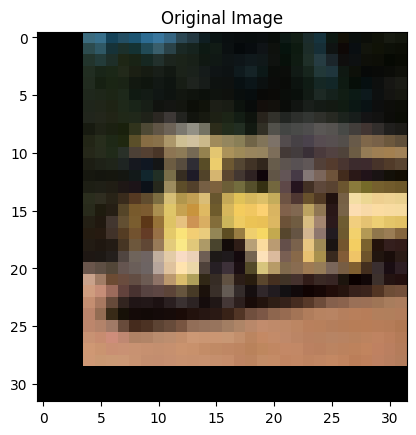

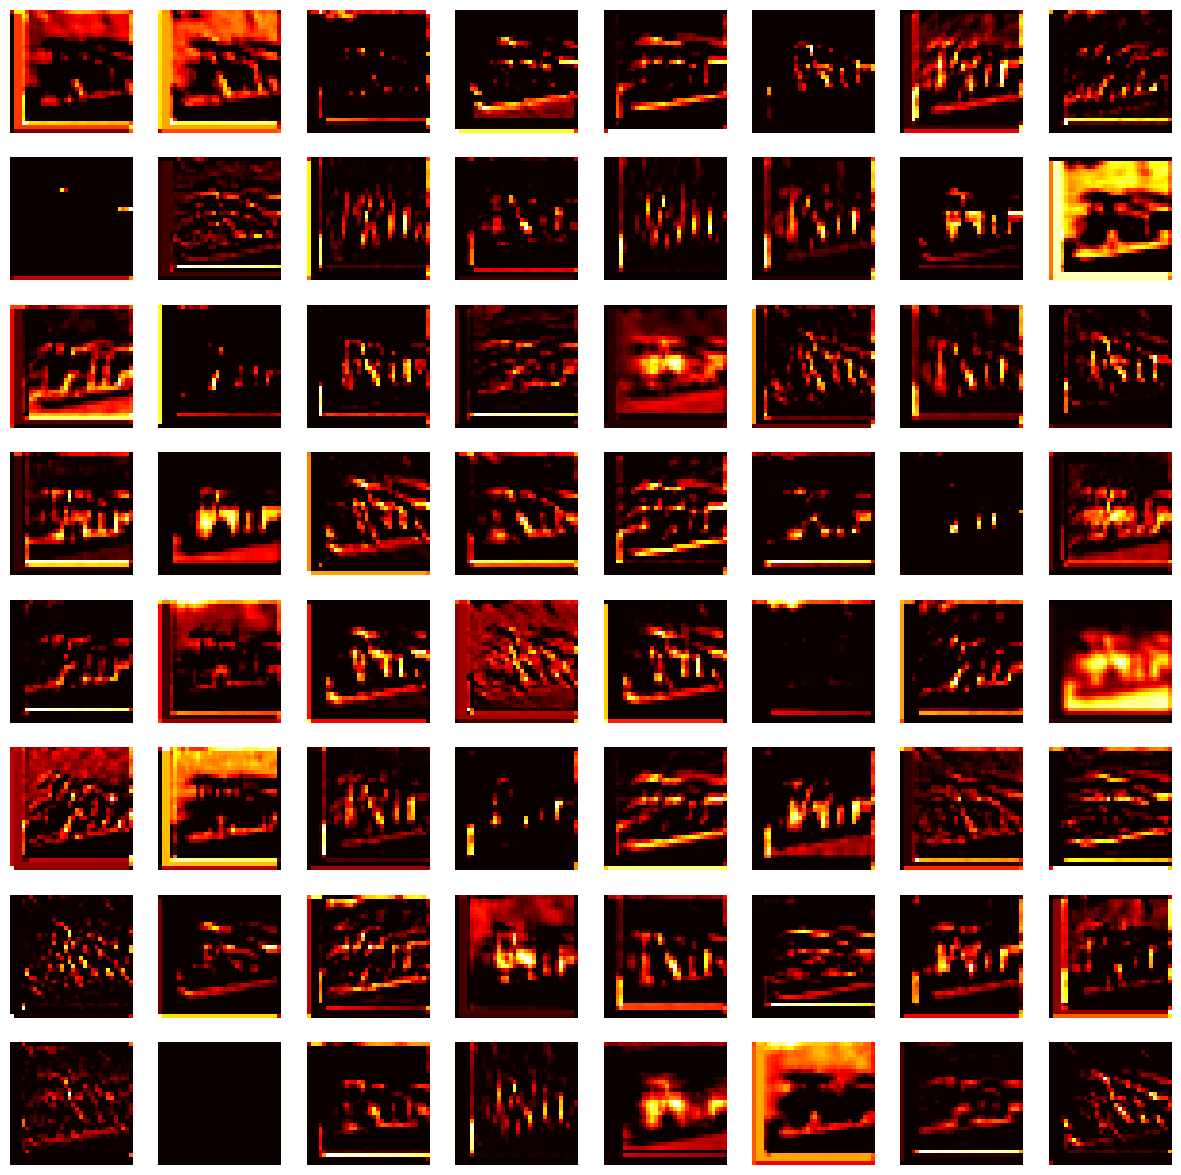

Predicted: automobile, Actual: automobile


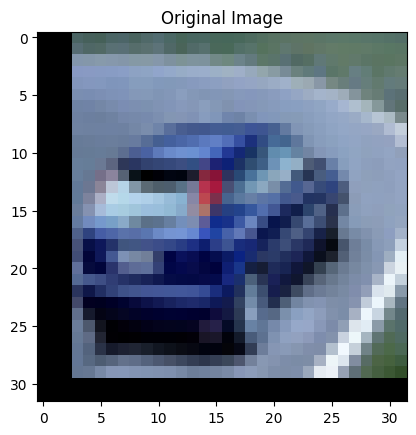

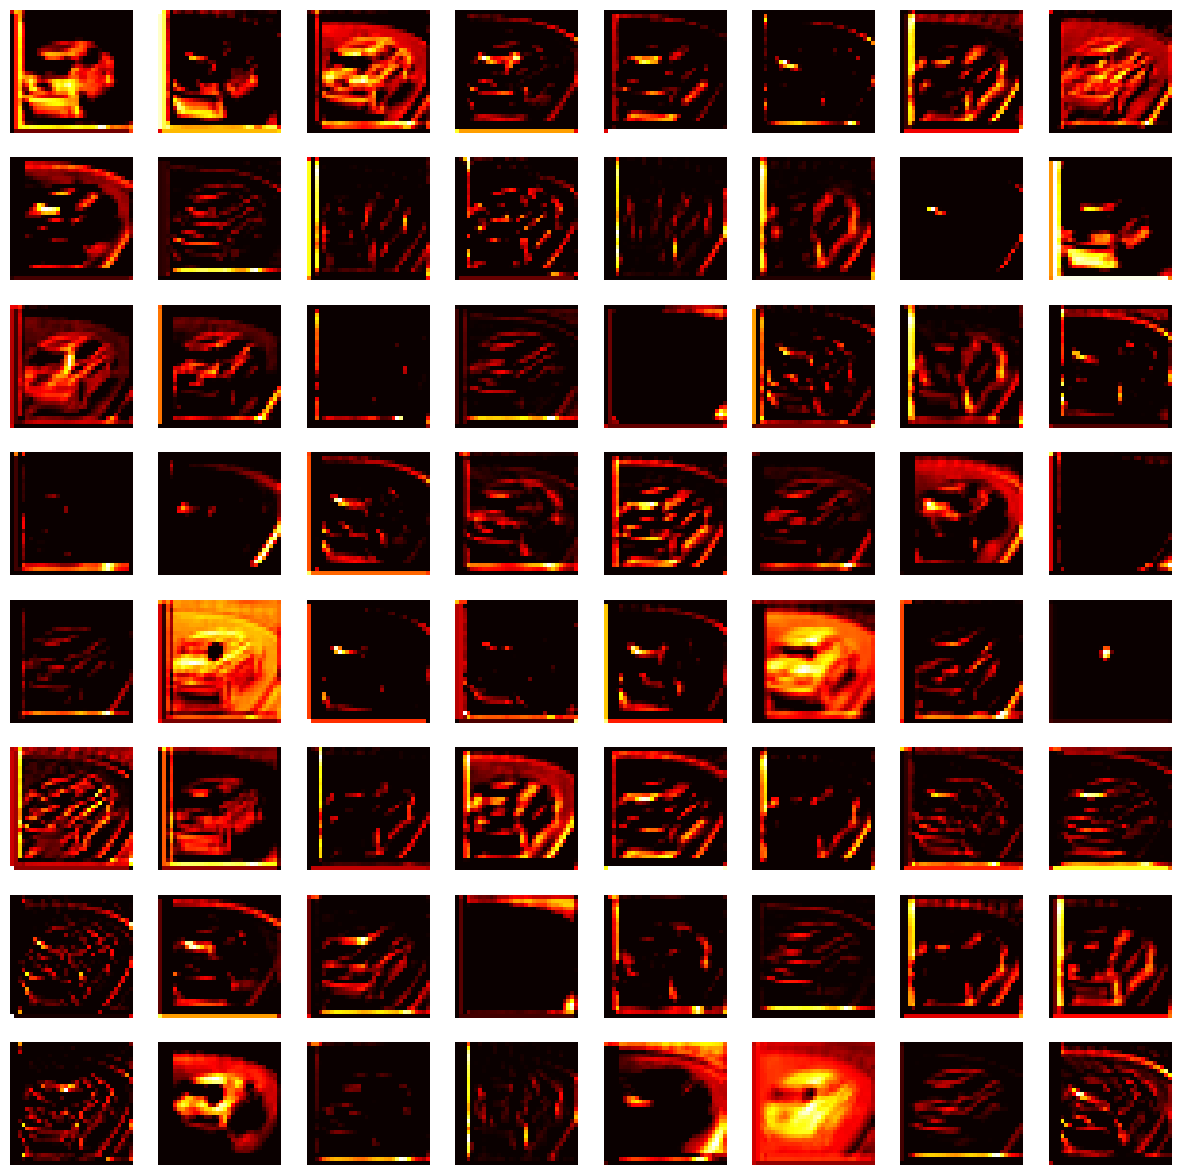

Predicted: dog, Actual: cat


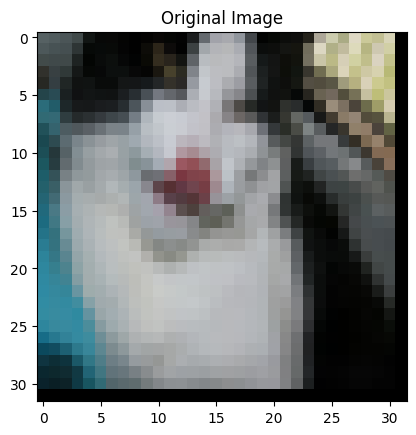

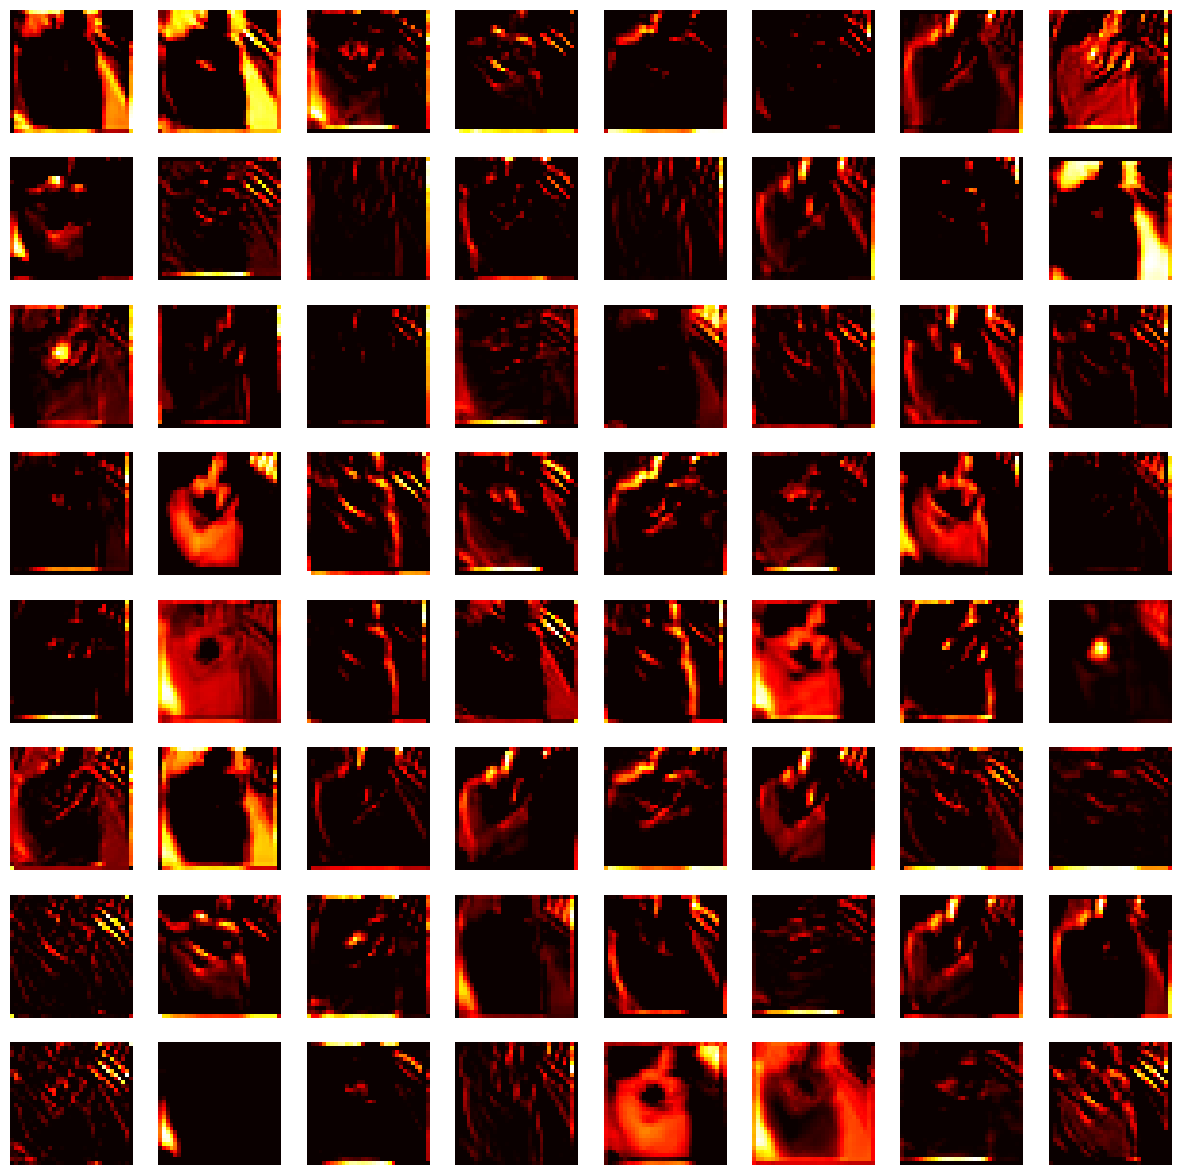

Predicted: truck, Actual: dog


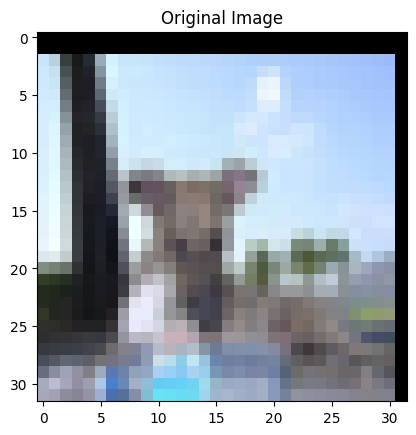

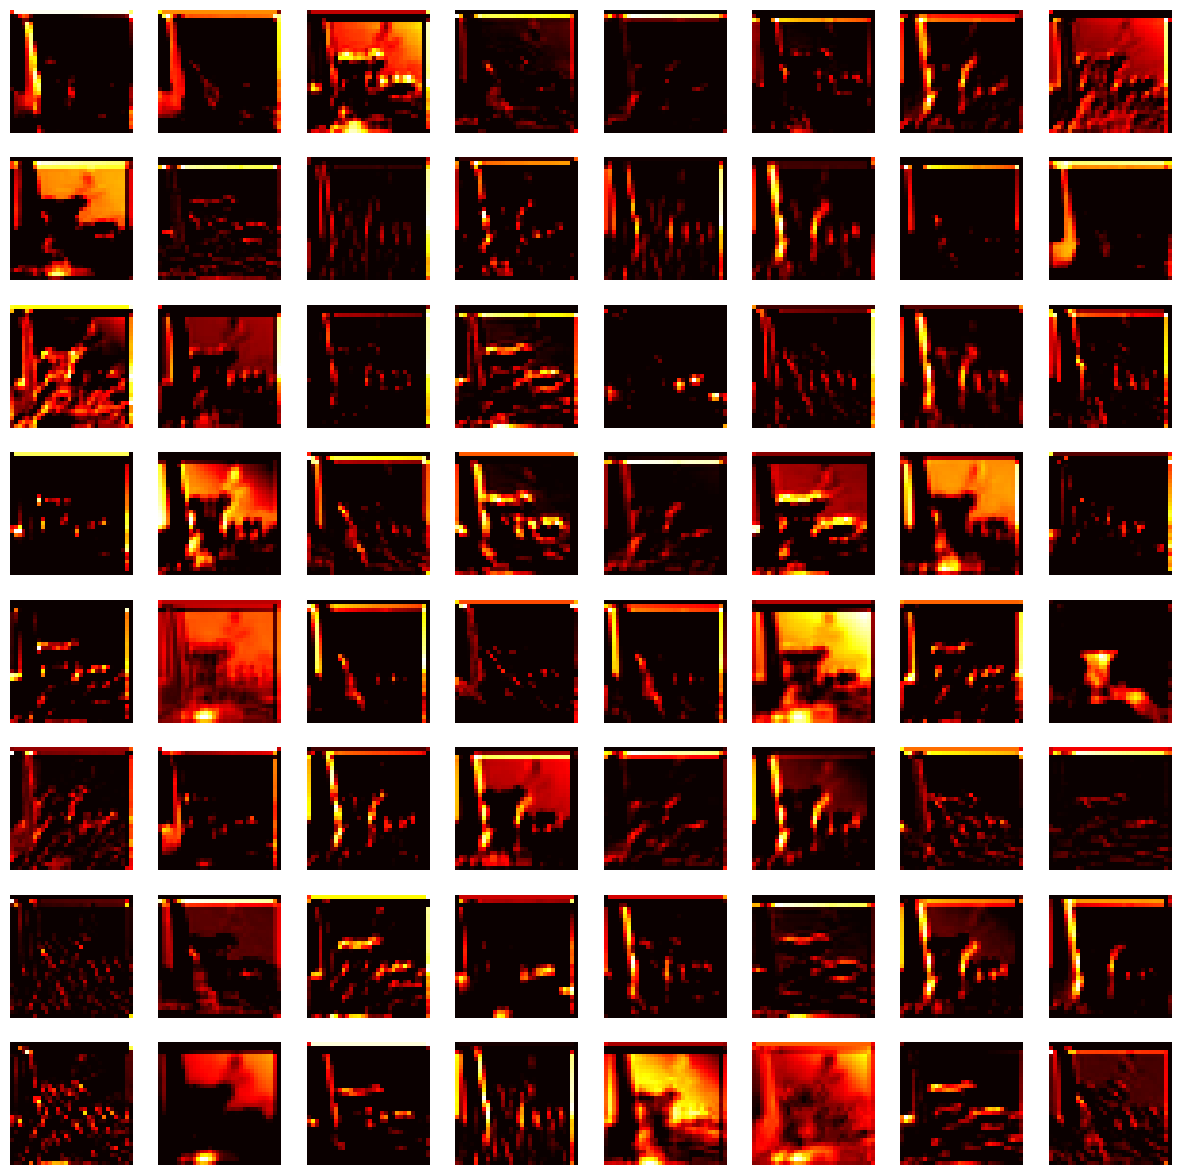

Predicted: ship, Actual: ship


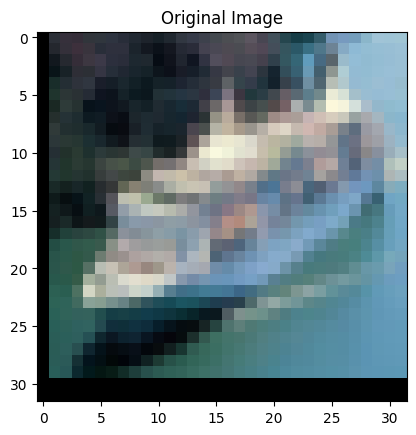

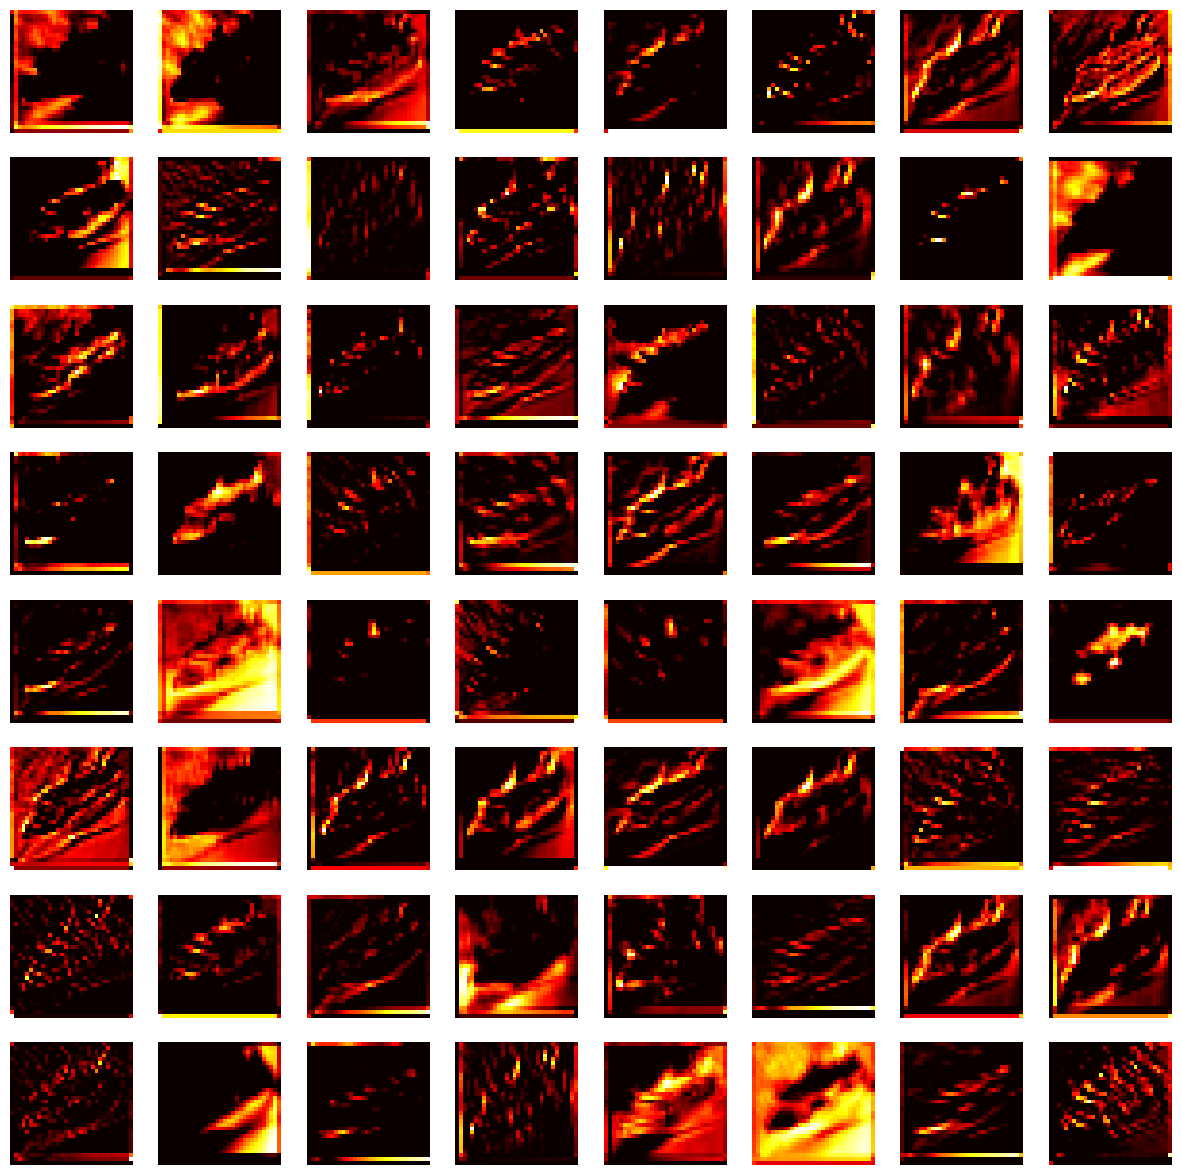

In [ ]:


def visualize_feature_maps(model, deconv_model, layer_name):
    model.eval()
    images, labels = next(iter(test_loader))
    images = images.to(device)
    labels = labels.to(device)

    # Generate random indices for 5 images
    indices = np.random.choice(images.shape[0], 5)

    # Loop through images
    for idx in indices:
        image = images[idx].unsqueeze(0)

        # Forward pass through the model
        x = model.relu1(model.conv1(image))
        if layer_name == 'conv1':
            feature_maps = x.detach()
        x, pool_indices = model.pool1(x)
        if layer_name == 'pool1':
            feature_maps = x.detach()
        x = model.relu2(model.conv2(x))
        if layer_name == 'conv2':
            feature_maps = x.detach()
        x = model.fc1(x.view(x.size(0), -1))
        if layer_name == 'fc1':
            feature_maps = x.detach()
        x = model.fc2(x)

        # Make prediction
        _, predicted_idx = torch.max(x.data, 1)
        predicted_class = class_names[predicted_idx]

        actual_class = class_names[labels[idx].item()]

        print(f"Predicted: {predicted_class}, Actual: {actual_class}")

        # Show original image
        original_image = denormalize(images[idx].cpu())
        original_image = original_image.permute(1, 2, 0)  # CxHxW -> HxWxC
        plt.figure()
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.show()

        # Visualize the first 64 feature maps
        plt.figure(figsize=(15, 15))
        for i in range(min(64, feature_maps.size(1))):
            plt.subplot(8, 8, i + 1)
            plt.imshow(feature_maps[0, i].cpu().numpy(), cmap='hot')
            plt.axis('off')
        plt.show()

# Call the function with the layer of interest
visualize_feature_maps(model, deconv_model, 'conv1')


The code snippet performs the following steps:

1. Loads the state_dict of `model1` from the saved file `model1.pth`.
2. Updates the `model` with the loaded state_dict.
3. Moves the `model` to the appropriate device (GPU or CPU).
4. Sets the `model` in evaluation mode.

The function `visualize_feature_projection` is defined to perform feature projection using Principal Component Analysis (PCA) on the specified layer's output. It takes the `model`, input tensor `x`, and the layer name as inputs.

The function performs the following steps:
1. Sets the `model` in evaluation mode.
2. Based on the layer name, applies the corresponding layers on the input tensor `x` to obtain the feature maps.
3. Reshapes the feature maps to flatten them along the channel dimension.
4. Applies PCA to reduce the dimensionality to 2 for visualization purposes.
5. Plots the projected features, with each class shown in a different color.

Next, an instance of `model1` is created and a list of convolutional layers to visualize, `conv_layers`, is defined. The code then iterates over the layers, calling `visualize_feature_projection` to visualize the feature projections for each layer using the `images` dataset.



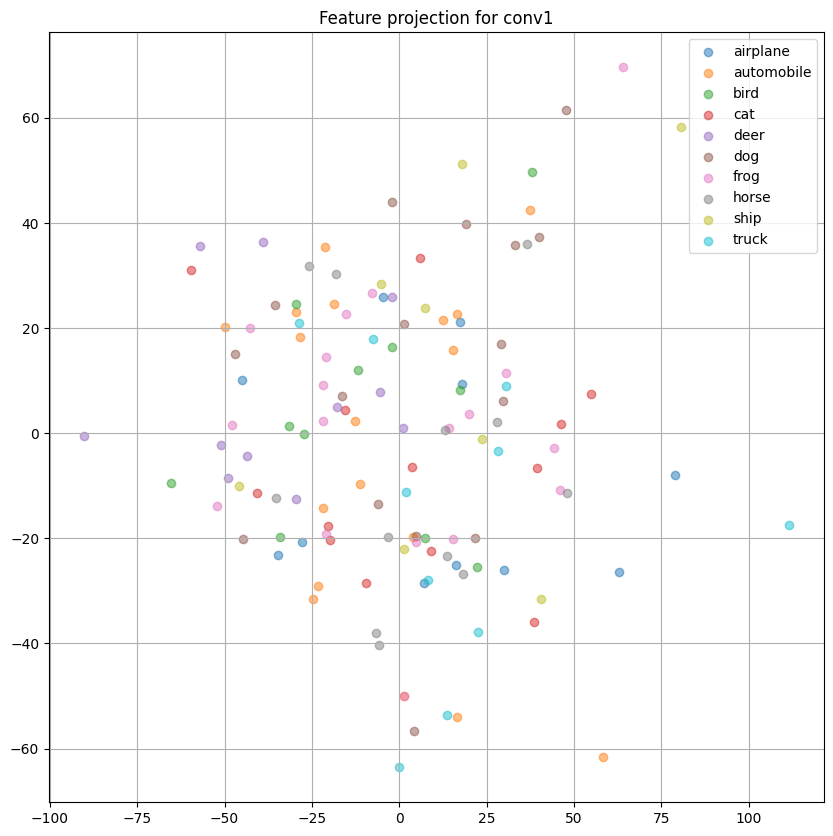

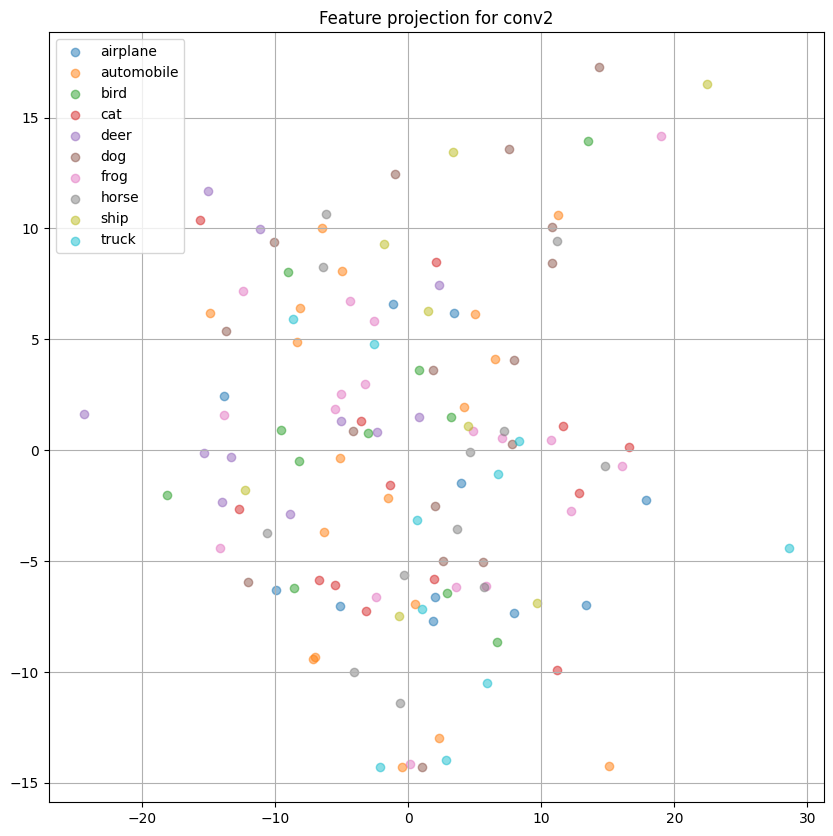

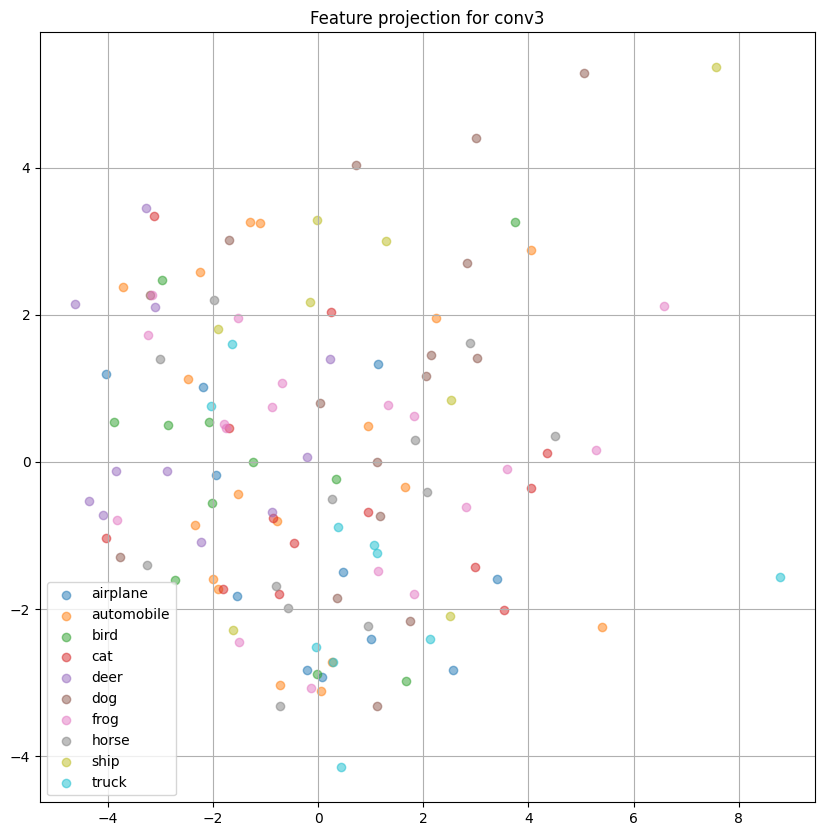

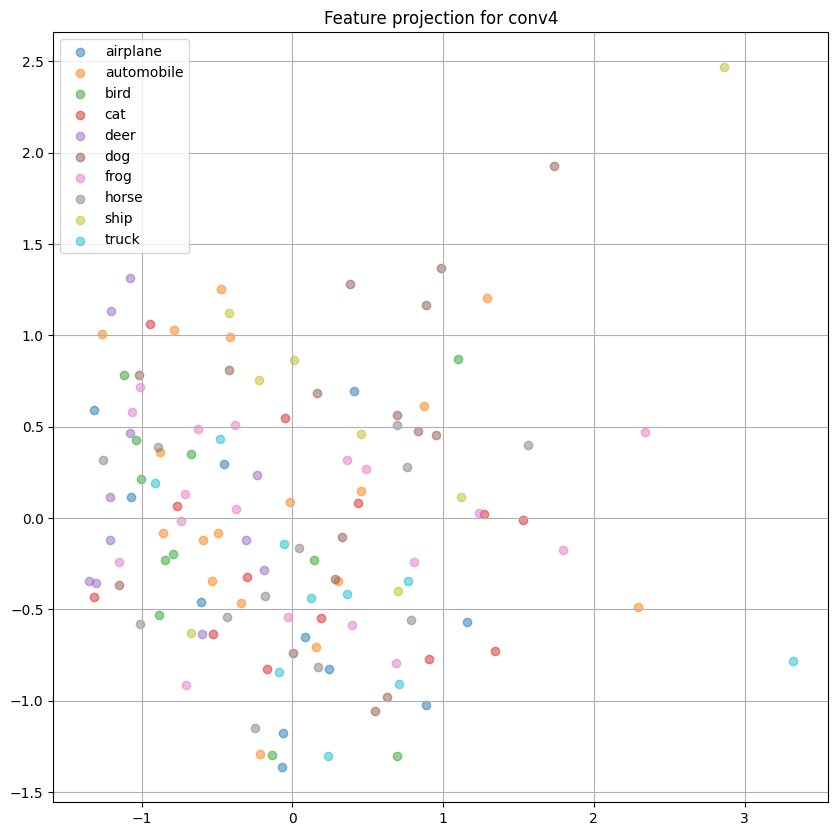

In [ ]:


# Load the state_dict
state_dict = torch.load('/models/model1.pth')

# Update the model with the loaded state_dict
model.load_state_dict(state_dict)

# Move model to the device
model = model.to(device)

# Set the model to evaluation mode
model.eval()
def visualize_feature_projection(model, x, layer_name):
    model.eval()

    if layer_name == 'conv1':
        x = model.conv1(x)
    elif layer_name == 'conv2':
        x = model.conv1(x)
        x = model.relu1(x)
        x = model.conv2(x)
    elif layer_name == 'conv3':
        x = model.conv1(x)
        x = model.relu1(x)
        x = model.conv2(x)
        x = model.relu2(x)
        x = model.maxpool1(x)
        x = model.dropout1(x)
        x = model.conv3(x)
    elif layer_name == 'conv4':
        x = model.conv1(x)
        x = model.relu1(x)
        x = model.conv2(x)
        x = model.relu2(x)
        x = model.maxpool1(x)
        x = model.dropout1(x)
        x = model.conv3(x)
        x = model.relu3(x)
        x = model.conv4(x)

    # Flatten the tensor along the channel dimension
    feature_maps = x.view(x.size(0), -1).cpu().detach().numpy()

    # Perform PCA
    pca = PCA(n_components=2)
    projected_features = pca.fit_transform(feature_maps)

    # Plot the projected features
    plt.figure(figsize=(10, 10))
    for i in range(10):
        indices = labels.cpu().numpy() == i
        plt.scatter(projected_features[indices, 0], projected_features[indices, 1], alpha=0.5, label=class_names[i])
    plt.legend()
    plt.grid(True)
    plt.title(f"Feature projection for {layer_name}")
    plt.show()

model1 = model1().to(device)
conv_layers = ['conv1', 'conv2', 'conv3', 'conv4']

for layer in conv_layers:
    visualize_feature_projection(model1, images, layer)





This is for `model2`

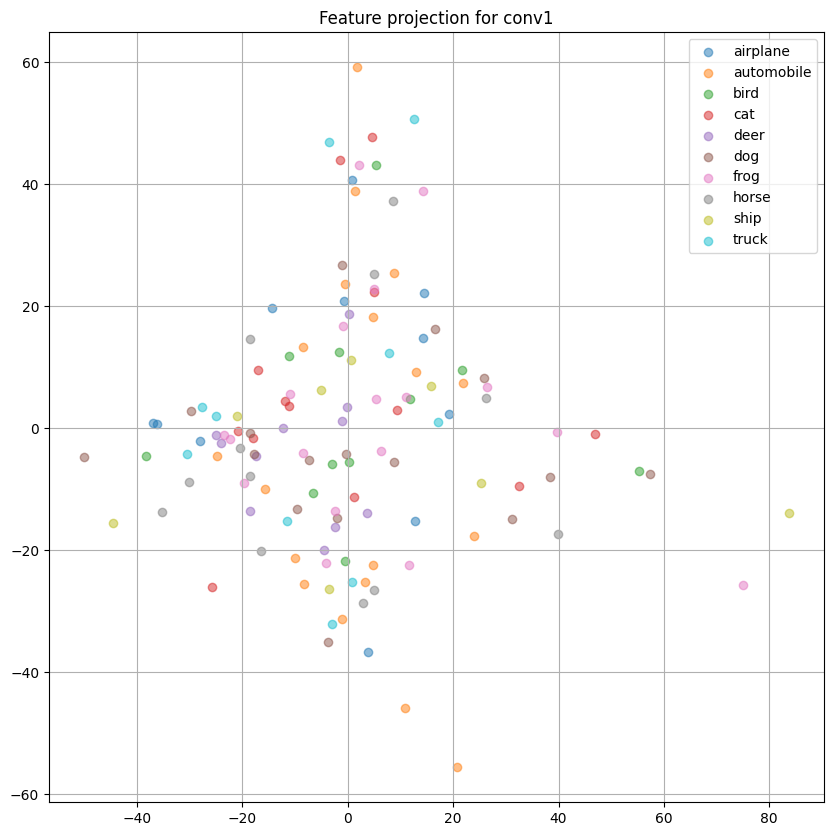

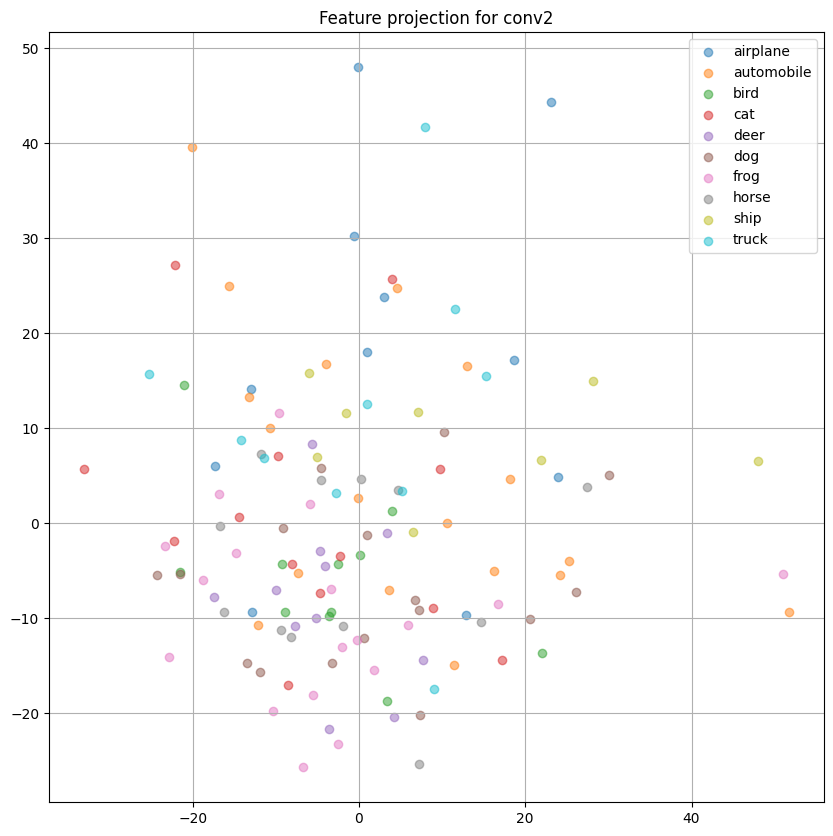

In [ ]:

def visualize_feature_projection(model, x, layer_name):
    model.eval()

    if layer_name == 'conv1':
        x = model.relu1(model.conv1(x))
    elif layer_name == 'conv2':
        x = model.relu1(model.conv1(x))
        _, _ = model.pool1(x)
        x = model.relu2(model.conv2(x))

    # Flatten the tensor along the channel dimension
    feature_maps = x.view(x.size(0), -1).cpu().detach().numpy()

    # Perform PCA
    pca = PCA(n_components=2)
    projected_features = pca.fit_transform(feature_maps)

    # Plot the projected features
    plt.figure(figsize=(10, 10))
    for i in range(10):
        indices = labels.cpu().numpy() == i
        plt.scatter(projected_features[indices, 0], projected_features[indices, 1], alpha=0.5, label=class_names[i])
    plt.legend()
    plt.grid(True)
    plt.title(f"Feature projection for {layer_name}")
    plt.show()

# Now, let's call this function for each conv layer
model2 = model2.to(device)

images, labels = next(iter(test_loader))
images = images.to(device)
labels = labels.to(device)

conv_layers = ['conv1', 'conv2']  # Add more layers if your model has them

for layer in conv_layers:
    visualize_feature_projection(model2, images, layer)
